## **Rice Grain Prediction using CNN Architecture** <br>  By Rahul Inchal

### Abstract 
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used. Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. Classification successes from the models were achieved as 99.87% for ANN, 99.95% for DNN and 100% for CNN. With the results, it is seen that the models used in the study in the classification of rice varieties can be applied successfully in this field.

### Importing important packages

In [1]:
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing libraries from keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as img_gen  

### Loading the data set from local

In [3]:
base_dir=r"/Users/rahulinchal/Desktop/Next/Part_data"

### Defining the traning and testing dataset

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Single ImageDataGenerator instance
datagen = img_gen(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% for validation
)

# Training data from same generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    #color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',   # Important for categorical_crossentropy
    subset='training',
    shuffle=True
)

# Validation data from same generator
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    #color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',   # Important for categorical_crossentropy
    subset='validation',
    shuffle=False
)

Found 2250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [5]:
class_names = list(val_generator.class_indices.keys())
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

### Importing keras models

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

### Defining the hidden layers

In [7]:
cnn = Sequential([
    Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'),
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(5, activation='softmax')
])

2025-04-25 07:52:24.985677: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-25 07:52:24.985700: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-25 07:52:24.985707: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-25 07:52:24.985721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-25 07:52:24.985732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Compiling the hidden layers

In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

### Defining epochs

In [9]:
epoch = 50

### Defining early stopping mechanisms

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',     # you can also monitor 'val_accuracy'
    patience=10,             # stop after 10s epochs with no improvement
    restore_best_weights=True,  # go back to the best weights
    mode='min',             # because we're minimizing val_loss
    verbose=1
)

### fitting the model

In [11]:
history = cnn.fit(train_generator, epochs=epoch, validation_data=val_generator, callbacks = [early_stop])

Epoch 1/50


2025-04-25 07:52:25.728797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.3863 - loss: 1.3951 - val_accuracy: 0.6920 - val_loss: 0.7345
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.7474 - loss: 0.6133 - val_accuracy: 0.7400 - val_loss: 0.6447
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.7872 - loss: 0.5187 - val_accuracy: 0.7800 - val_loss: 0.5118
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.8036 - loss: 0.4618 - val_accuracy: 0.7840 - val_loss: 0.4842
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.8027 - loss: 0.4448 - val_accuracy: 0.8160 - val_loss: 0.4343
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.8222 - loss: 0.4211 - val_accuracy: 0.8160 - val_loss: 0.4411
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.8382 - loss: 0.4152 - val_accuracy: 0.7800 - val_loss: 0.4601
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.8145 - loss: 0.4289 - val_accuracy: 0.816

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           725 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,817 (300.07 KB)

 Trainable params: 25,605 (100.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,212 (200.05 KB)

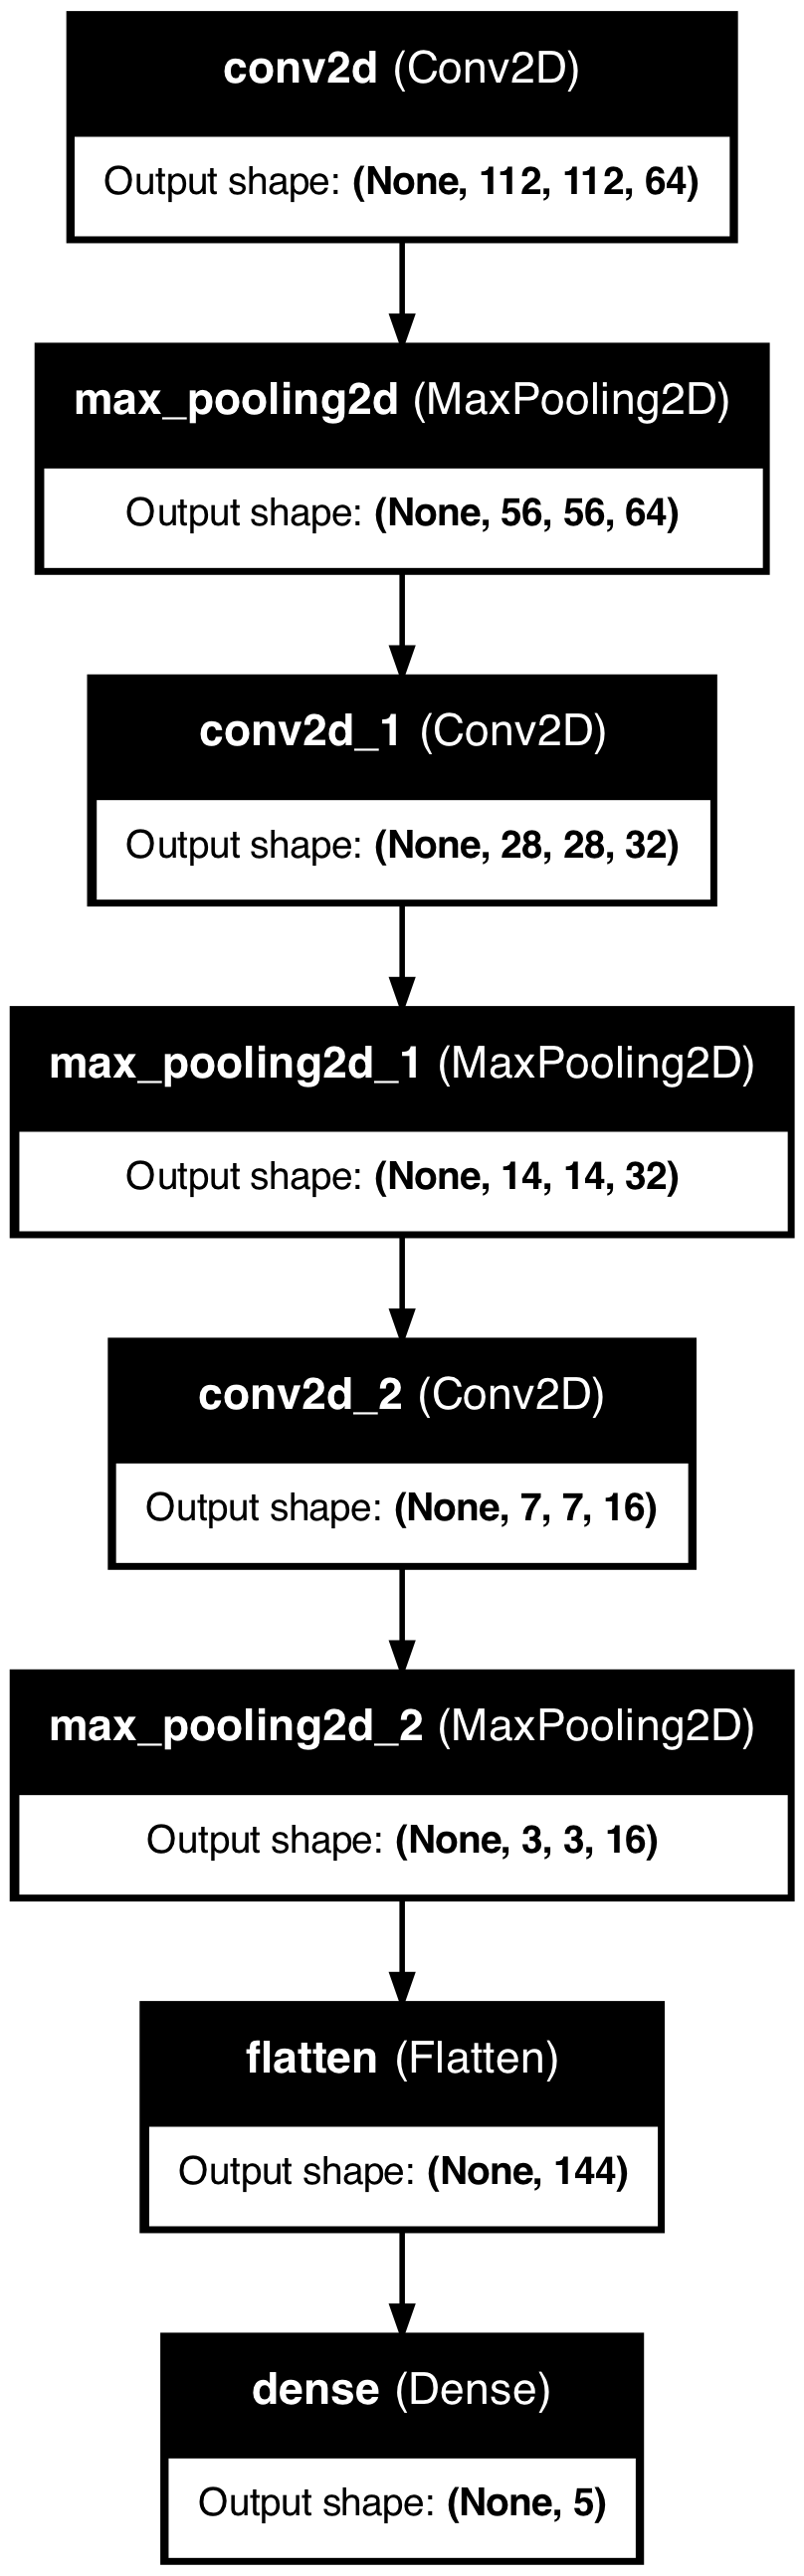

In [22]:
import pydot
tf.keras.utils.plot_model(cnn, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

### Defining the accuracy, validation accuracy, loss, and validation loss

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  

### Printing the metrics

In [13]:
Accuracy_Score = round(acc[len(acc)-1]*100, 2)
print("The Accuracy for the model is: ", Accuracy_Score, '%')

Validation_Score = round(val_acc[len(val_acc)-1]*100, 2)
print("The Validation Accuracy for the model is: ",Validation_Score , "%\n")

Loss_score = round(loss[len(loss)-1], 2)
print("The loss for the model is: ", Loss_score)

Validation_loss = round(val_loss[len(val_loss)-1], 2)
print("The Validation Loss for the model is: ", Validation_loss)

The Accuracy for the model is:  96.4 %
The Validation Accuracy for the model is:  96.0 %

The loss for the model is:  0.1
The Validation Loss for the model is:  0.11


### Plotting the training and loss

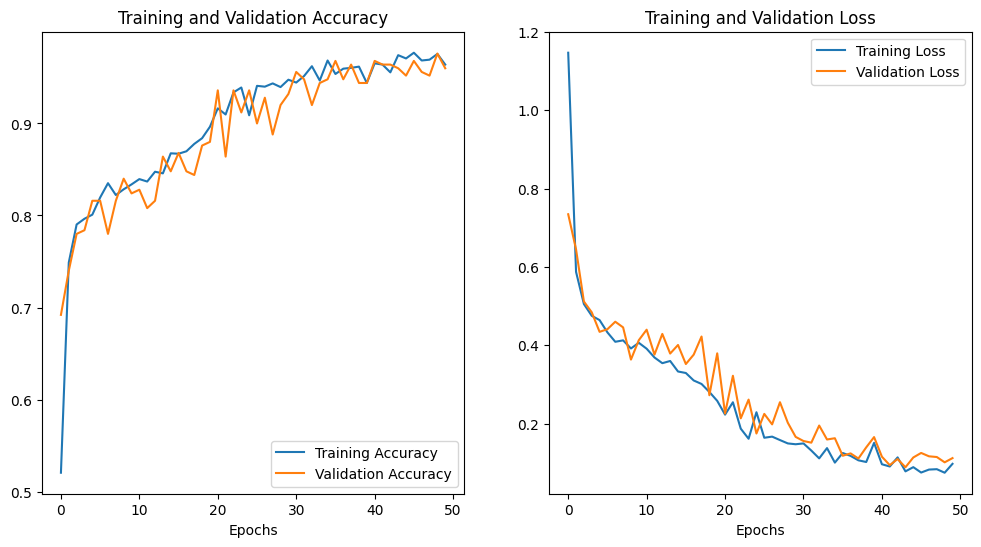

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.title('Training and Validation Loss')
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image

In [16]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) #color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize

    predictions = cnn.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_label = class_names[predicted_index]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    #return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


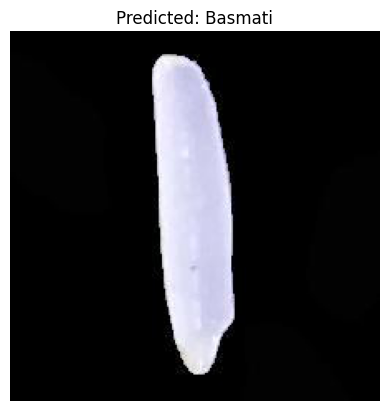

In [17]:
predict_image('/Users/rahulinchal/Desktop/Next/Rice_Image_Dataset/Basmati/basmati (669).jpg')

In [18]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `cnn` is your trained model and `val_generator` is the validation data generator

# Get the predictions on the validation data
y_true = val_generator.classes  # Actual labels from validation data
y_pred = cnn.predict(val_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices

# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the metrics
print("Accuracy: ", round(accuracy * 100, 2), "%")
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1 Score: ", round(f1, 2))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
Accuracy:  98.0 %
Precision:  0.98
Recall:  0.98
F1 Score:  0.98


### Confusion metrics

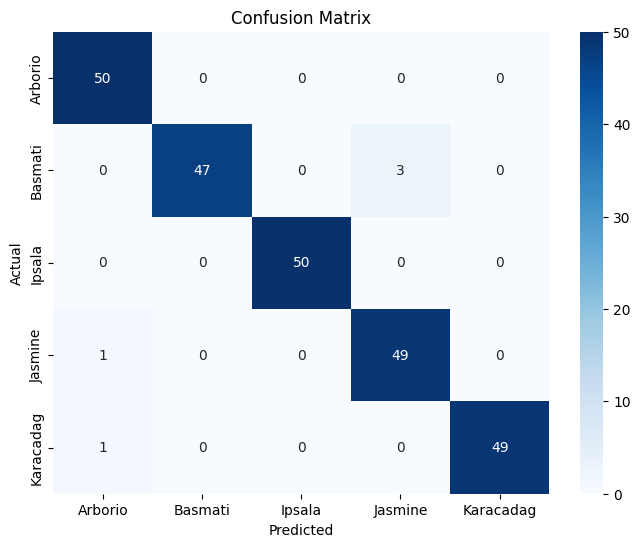

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Observation
1. Ipsala and Karacadag have almost perfect classification with just 1 misclassification each.
2. Basmati and Jasmine seem to be slightly confused with each other, which might indicate overlapping features between those two varieties.
3. Arborio has a few misclassifications across 3 different classes, but still maintains strong accuracy.